This is my first deep learning model.   

It is based on the exercise assigned by the YouTube Channel "Codebasics" at the following video: https://www.youtube.com/watch?v=MSBY28IJ47U&t=2083s  

It is a very basic model with a few EDA and feature engineering, I will implement it in the future.  

Dataset: https://www.kaggle.com/datasets/santoshd3/bank-customers

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

## Importing Dataset

In [2]:
bank_df = pd.read_csv('./bank_churn.csv')
bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA 

First of all, the first column should be dropped.

In [3]:
bank_df.drop(columns='RowNumber', inplace=True)

In [4]:
bank_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


There are no null values.  

Checking for duplicates.

In [6]:
bank_df[bank_df.duplicated(keep=False)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicated values.  

Now, let's explore some features by asking some questions:  

1- What is the average salary of those ones who left? Is it higher than those ones who stayed?  
2- Is there a relationship between the balance and the estimated salary?  
3- Is there a relationship between the credit score and the estimated salary?  
4- How is the salary distributed between genders?  
5- Which country has the highest number of exited customers?  
6- The average tenure for those who left and those who stayed.   
7- What is the average balance of the active and not active members?  

For many of those questions it would be sufficient to use a correlation matrix, however it will be provided even the single graphs.


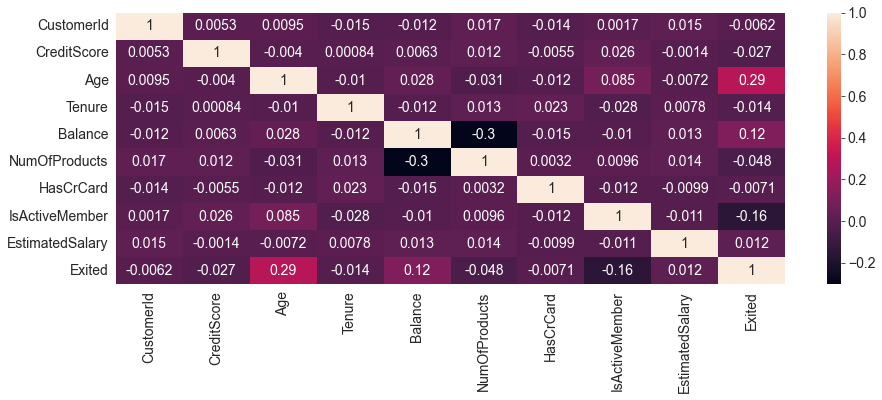

In [7]:
sns.heatmap(bank_df.corr(), annot=True);

The matrix includes even the categorical variables encoded as numeric, by the way the matrix is good to obtain some key information.

### Question 1 - What is the average salary of those ones who left? Is it higher than those ones who stayed? 

In [8]:
left_df = bank_df[bank_df.Exited==1]
stayed_df = bank_df[bank_df.Exited==0]

In [9]:
print('Left:',left_df.shape)
print('Stayed:',stayed_df.shape)

Left: (2037, 13)
Stayed: (7963, 13)


The majority of the customers stayed.

In [10]:
print('Avg left salary:',left_df.EstimatedSalary.mean())
print('Avg stayed salary:', stayed_df.EstimatedSalary.mean())

Avg left salary: 101465.67753068237
Avg stayed salary: 99738.39177194524


The average estimated salary of the exited ones is higher.  

### Question 2 - Is there a relationship between the balance and the estimated salary?

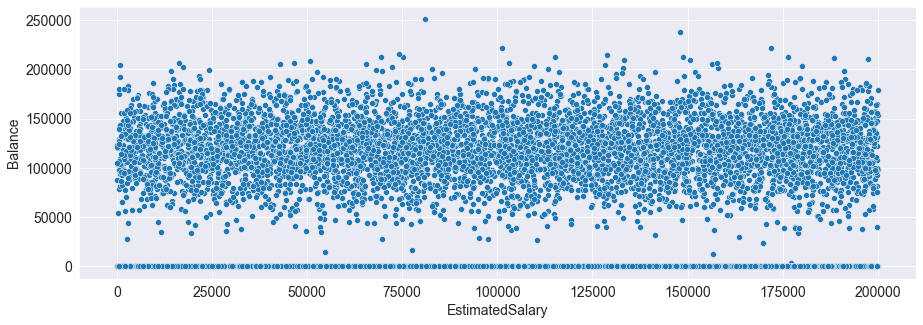

In [11]:
sns.scatterplot(data=bank_df, y='Balance', x='EstimatedSalary');

It does not seem to be a relation, as already seen in the heatmap.

### Question 3 - Is there a relationship between the credit score and the estimated salary?

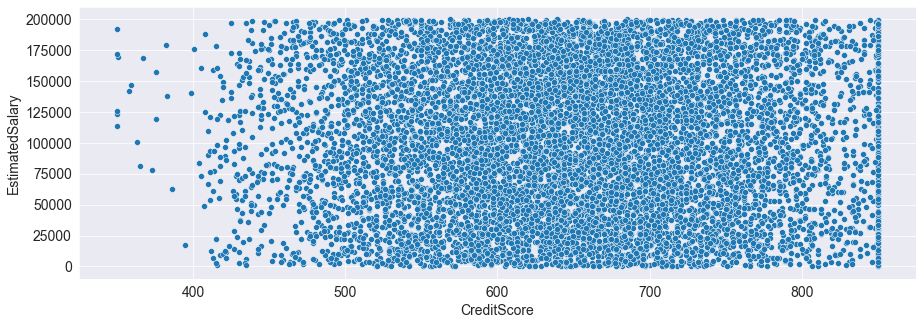

In [12]:
sns.scatterplot(data=bank_df, x='CreditScore', y='EstimatedSalary');

The result can be interpreted in the same way as before.

### Question 4 - How is the salary distributed between genders?  

In [13]:
female_df = bank_df[bank_df.Gender=='Female']
male_df = bank_df[bank_df.Gender=='Male']
print('female_df shape:',female_df.shape)
print('male_df shape:',male_df.shape)

female_df shape: (4543, 13)
male_df shape: (5457, 13)


Males are more.

In [14]:
print('Avg Salary for females: {}'.format(female_df.EstimatedSalary.mean()))
print('Avg Salary for males: {}'.format(male_df.EstimatedSalary.mean()))

Avg Salary for females: 100601.54138234646
Avg Salary for males: 99664.5769305479


The average salary for females is higher.

### Question 5 - Which country has the highest number of exited customers?

In [15]:
left_df.Geography.value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

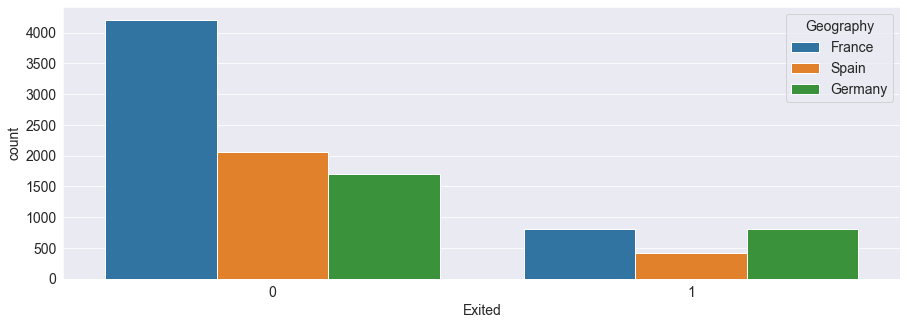

In [16]:
sns.countplot(data=bank_df, x='Exited', hue='Geography');

Germany have the most exited customers.

### Question 6 - The average tenure for those who left and those who stayed.

In [17]:
print('Exited tenure mean: {}'.format(left_df.Tenure.mean()))
print('Stayed tenure mean: {}'.format(stayed_df.Tenure.mean()))

Exited tenure mean: 4.932744231713304
Stayed tenure mean: 5.033278914981791


It does not seem to be a huge difference in the tenure.

### Question 7 - What is the average balance of the active and not active members? 

In [18]:
print('Non-active members average balance: {}'.format(bank_df[bank_df.IsActiveMember == 0].Balance.mean()))
print('Active members average balance: {}'.format(bank_df[bank_df.IsActiveMember==1].Balance.mean()))

Non-active members average balance: 77134.37686327078
Active members average balance: 75875.42214521453


## Feature Engineering

In [19]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


The first thing to do is creating an input dataframe to encode only the needed variables.

### Creating an Input Dataframe

In [20]:
input_df = bank_df.drop(columns=['CustomerId', 'Surname', 'Exited'])
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [21]:
target = bank_df.Exited
target.shape

(10000,)

Now, they should be divided into categorical and numerical.

In [22]:
numerical_cols = input_df.select_dtypes(np.number).columns.to_list()
categorical_cols = input_df.select_dtypes('object').columns.to_list()

print('Numerical columns: {}'.format(numerical_cols))
print('Categorical columns: {}'.format(categorical_cols))

Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical columns: ['Geography', 'Gender']


'Gender' feature can be encoded by using a simple ".map()" function; for 'Geography' it is possible to use ".get_dummies()".

In [23]:
# Creating the dictionary
gender_dict = {'Female':0, 'Male':1}

# Mapping
input_df['Gender'] = input_df.Gender.map(gender_dict)

In [24]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [25]:
# Creating another data frame with ".get_dummies"
input_df=pd.concat([input_df,pd.get_dummies(input_df.Geography)], axis=1).drop(columns='Geography')
input_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


In [26]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   France           10000 non-null  uint8  
 10  Germany          10000 non-null  uint8  
 11  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


All the columns are numeric now.  

Now, it is possible to scale the values.

### Scaling Values

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(input_df[numerical_cols])

input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

In [28]:
input_df.describe().loc[['min', 'max']]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The values are all in the range between 0 and 1.

## Creating a Test Set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_df, target, test_size=0.2, random_state=42)

In [30]:
# Seeing the shape of the X data frames

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (8000, 12)
Test shape: (2000, 12)


In [31]:
# Seeing the shape of the y data frame

print('Target shape: {}'.format(y_train.shape))
print('Target shape: {}'.format(y_train.shape))

Target shape: (8000,)
Target shape: (8000,)


## Building the Model

In [32]:
# Importing the libraries

import tensorflow as tfl
from tensorflow import keras 

In [64]:
# Creating the model
deep_learning_model = keras.Sequential([

    keras.layers.Dense(30, input_shape=(12,), activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling

deep_learning_model.compile(

    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training it

deep_learning_model.fit(X_train, y_train, epochs=30)

Epoch 1/30
250/250 [==============================] - 1s 2ms/step - loss: 0.5053 - accuracy: 0.7910
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7989
Epoch 3/30
250/250 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8019
Epoch 4/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8067
Epoch 5/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8123
Epoch 6/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8156
Epoch 7/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8199
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8250
Epoch 9/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8266
Epoch 10/30
250/250 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8292

Evaluating the model.

In [65]:
deep_learning_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8565


[0.3475174009799957, 0.8565000295639038]

## Some Random Guesses  

They are necessary to see how the model works compared to a "dumb" one.

In [62]:
# Creating a "dumb" model
def dumb_model(inputs):
    return np.full(len(inputs), 0)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dumb_model(X_test))

0.8035

The model performs better than a "dumb" model made of 0s.

## Conclusions  

As a first experience with deep learning, I can assume that it is quite simpler to implement than some machine learning models.  

By the way, this is only the very first step, there are a lot of tests that can be done on it, for example by creating new features or removing outliers.